一段质量均匀分布的电缆线悬挂在两点之间, 构成一段悬链, 其满
足如下微分方程:
 $$ \frac {d^ {2}y}{dx^ {2}}  =  \frac {w}{T_ {A}}  \sqrt {1+(\frac {dy}{dx})^ {2}} $$ 
其中, $ T_ {A} $ 为悬链最低点的张力。若悬链最低点的高度为 $ y_ {0} $ ,则该微
分方程的解析解为:
$$y=  \frac {T_ {A}}{w}\cosh  (  \frac {w}{T_ {A}}  x)+  y_ {0}  -  \frac {T_ {A}}{w} $$
这里
 $$ \cosh  (x)=  \frac {e^ {x}+e^ {-x}}{2} $$ 
若w=10和 $ y_ {0} $ =5时,悬链在x=50处的高度为y=15.请分别
利用二分法、
牛顿法和割线法求解参数 $ T_ {A} $ 并比较收敛速度。


$$
\sinh(x)=\frac{e^x-e^{-x}}{2}\\
\frac{d \cosh(x)}{dx}=\sinh(x)\\
$$

$$
y=f(x,T_A)=  \frac {T_ {A}}{w}\cosh  (  \frac {w}{T_ {A}}  x)+  y_ {0}  -  \frac {T_ {A}}{w}\\
\frac {dy}{dT_A}=\frac {1}{w}\cosh  (  \frac {w}{T_ {A}}  x)-  \frac {x}{T_ {A}}\sinh  (  \frac {w}{T_ {A}}  x)-  \frac {1}{w}\\
$$

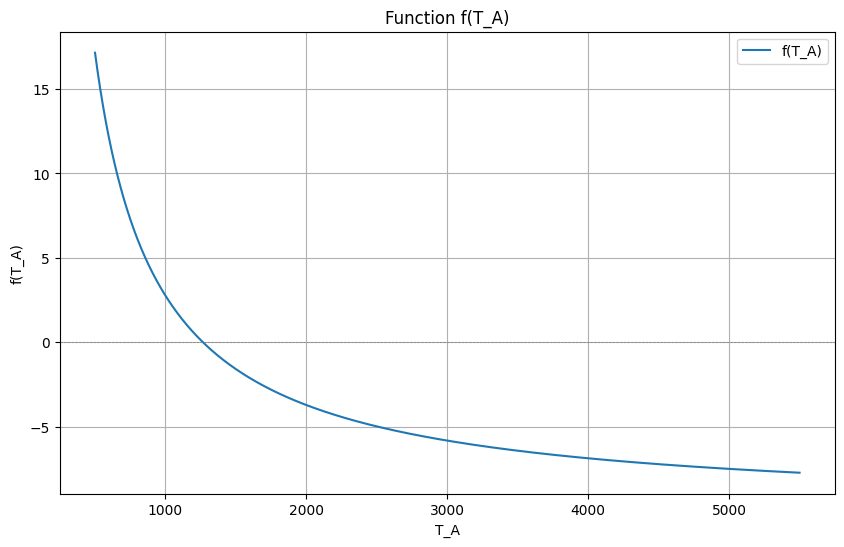

In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np

# 定义函数 f(T_A)
def f(T_A):
    w = 10
    y0 = 5
    x = 50
    y = 15
    return (T_A / w) * math.cosh((w / T_A) * x) + y0 - (T_A / w) - y

# 生成 T_A 的值
T_A_values = np.linspace(500, 5500, 10000)  # 增加采样点数量

# 计算 f(T_A) 的值
f_values = [f(T_A) for T_A in T_A_values]

# 绘制函数
plt.figure(figsize=(10, 6))
plt.plot(T_A_values, f_values, label='f(T_A)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('T_A')
plt.ylabel('f(T_A)')
plt.title('Function f(T_A)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
import math

# 定义函数 f(T_A) = y(T_A) - y
def f(T_A):
    w = 10
    y0 = 5
    x = 50
    y = 15
    return (T_A / w) * math.cosh((w / T_A) * x) + y0 - (T_A / w) - y

# 定义函数 f 的导数 f_prime(T_A)
def f_prime(T_A):
    w = 10
    x = 50
    return (1 / 10) * (math.cosh((500 / T_A)) - (500 / T_A) * math.sinh((500 / T_A))) - (1 / 10)

# 二分法
def bisection_method():
    a = 1
    b = 1500
    tolerance = 0.0001  # 精度要求
    iterations = 0

    while (b - a) > tolerance:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    return (a + b) / 2, iterations

# 牛顿法
def newton_method():
    T_A0 = 100  # 初始值
    tolerance = 0.0001  # 精度要求
    iterations = 0

    T_An = T_A0
    while True:
        T_An1 = T_An - f(T_An) / f_prime(T_An)
        iterations += 1
        if abs(T_An1 - T_An) < tolerance:
            break
        T_An = T_An1
    return T_An1, iterations

# 割线法
def secant_method():
    T_A0 = 1000
    T_A1 = 2500
    tolerance = 0.0001  # 精度要求
    iterations = 0

    while True:
        T_An = T_A1 - f(T_A1) * (T_A1 - T_A0) / (f(T_A1) - f(T_A0))
        iterations += 1
        print(iterations, T_An, T_A1)
        if abs(T_An - T_A1) < tolerance:
            break
        T_A0 = T_A1
        T_A1 = T_An
    return T_An, iterations

# 打印结果
bisection_result, bisection_iterations = bisection_method()
newton_result, newton_iterations = newton_method()
secant_result, secant_iterations = secant_method()

print("二分法求解的结果：", bisection_result, "，迭代次数：", bisection_iterations)
print("牛顿法求解的结果：", newton_result, "，迭代次数：", newton_iterations)
print("割线法求解的结果：", secant_result, "，迭代次数：", secant_iterations)

1 1534.9785959837036 2500
2 996.720492058777 1534.9785959837036
3 1325.766993962972 996.720492058777
4 1279.4956990274998 1325.766993962972
5 1265.6828934508762 1279.4956990274998
6 1266.3312862529488 1265.6828934508762
7 1266.3243640421163 1266.3312862529488
8 1266.3243603998708 1266.3243640421163
9 1266.3243603998883 1266.3243603998708
10 1266.3243603998867 1266.3243603998883
11 1266.3243603998867 1266.3243603998867
二分法求解的结果： 1266.3243479430676 ，迭代次数： 24
牛顿法求解的结果： 1266.3243603998892 ，迭代次数： 12
割线法求解的结果： 1266.3243603998867 ，迭代次数： 11


$$
\begin{align*}

$$

w=10
y_0=5
x=50,y=15

首先，我们将已知条件代入方程：
[
\begin{align*}
15&=\frac{T_{A}}{10}\cosh(\frac{10}{T_{A}}\times50)+5-\frac{T_{A}}{10}\
\end{align*}
]
令 (f(T_{A}) = \frac{T_{A}}{10}\cosh(\frac{10}{T_{A}}\times50)+5-\frac{T_{A}}{10} - 15)
二分法：
设区间 ([a,b])，使得 (f(a)) 和 (f(b)) 异号。
先取 (a = 1)，(b = 100) ，计算 (f(a)) 和 (f(b)) ：
[
\begin{align*}
f(1)&=\frac{1}{10}\cosh(\frac{10}{1}\times50)+5-\frac{1}{10} - 15\
&=\frac{1}{10}\cosh(500)+5-\frac{1}{10} - 15 < 0\
\end{align*}
]
[
\begin{align*}
f(100)&=\frac{100}{10}\cosh(\frac{10}{100}\times50)+5-\frac{100}{10} - 15\
&=10\cosh(5)+5 - 10 - 15 > 0\
\end{align*}
]
然后计算区间中点 (c = \frac{a + b}{2}) ，判断 (f(c)) 的符号，若 (f(c)) 与 (f(a)) 同号，则令 (a = c)；若 (f(c)) 与 (f(b)) 同号，则令 (b = c) 。重复此过程，直到区间长度足够小。
牛顿法：
(f'(T_{A}) = \frac{1}{10}\left(\cosh(\frac{500}{T_{A}}) - \frac{500}{T_{A}}\sinh(\frac{500}{T_{A}})\right) - \frac{1}{10})
设初始值 (T_{A0}) ，然后通过迭代公式 (T_{An + 1} = T_{An} - \frac{f(T_{An})}{f'(T_{An})}) 进行迭代计算。
割线法：
设两个初始值 (T_{A0}) 和 (T_{A1}) ，通过迭代公式 (T_{An + 1} = T_{An} - \frac{f(T_{An})(T_{An} - T_{An - 1})}{f(T_{An}) - f(T_{An - 1})}) 进行迭代计算。
比较收敛速度：
一般来说，在多数情况下，牛顿法的收敛速度最快，其次是割线法，二分法相对较慢。但具体的收敛速度还会受到函数的性质和初始值的选择等因素的影响。

In [ ]:
import math

# 定义函数 f(T_A)
def f(T_A):
    w = 10
    y0 = 5
    x = 50
    y = 15
    return (T_A / w) * math.cosh((w / T_A) * x) + y0 - (T_A / w) - y

# 定义函数 f 的导数 f_prime(T_A)
def f_prime(T_A):
    w = 10
    x = 50
    return (1 / 10) * (math.cosh((500 / T_A)) - (500 / T_A) * math.sinh((500 / T_A))) - (1 / 10)

# 二分法
def bisection_method():
    a = 1
    b = 100
    tolerance = 0.0001  # 精度要求

    while (b - a) > tolerance:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# 牛顿法
def newton_method():
    T_A0 = 50  # 初始值
    tolerance = 0.0001  # 精度要求

    T_An = T_A0
    while True:
        T_An1 = T_An - f(T_An) / f_prime(T_An)
        if abs(T_An1 - T_An) < tolerance:
            break
        T_An = T_An1
    return T_An1

# 割线法
def secant_method():
    T_A0 = 1
    T_A1 = 100
    tolerance = 0.0001  # 精度要求

    while True:
        T_An = T_A1 - f(T_A1) * (T_A1 - T_A0) / (f(T_A1) - f(T_A0))
        if abs(T_An - T_A1) < tolerance:
            break
        T_A0 = T_A1
        T_A1 = T_An
    return T_An

# 打印结果
print("二分法求解的结果：", bisection_method())
print("牛顿法求解的结果：", newton_method())
print("割线法求解的结果：", secant_method())